In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv("../data/heart_disease_pca.csv")

In [41]:
X = df.drop(columns=["target"])
y = df["target"]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

C:\Users\compumarts\AppData\Local\Temp\ipykernel_2084\1453991023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:15], y=importances.index[:15], palette="viridis")


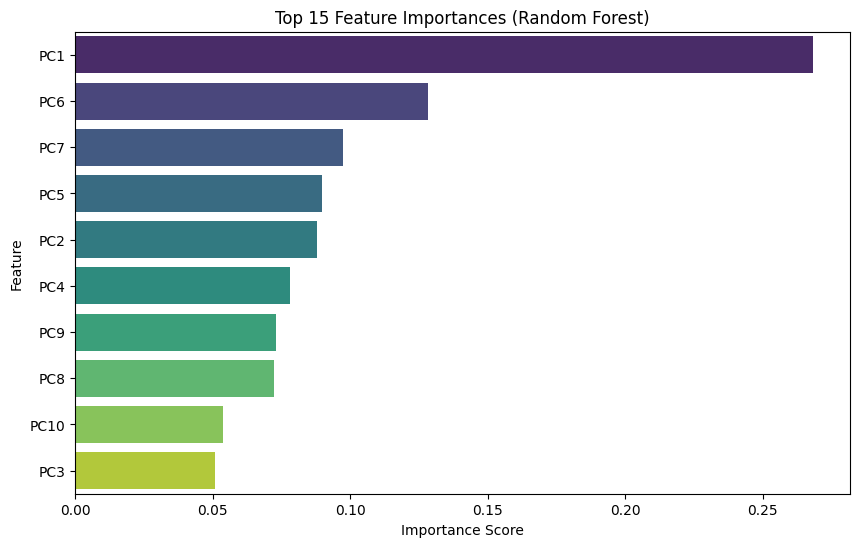

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances[:15], y=importances.index[:15], palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [45]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=10)
rfe.fit(X_train, y_train)

selected_rfe = pd.Series(rfe.support_, index=X.columns)
rfe_features = selected_rfe[selected_rfe].index.tolist()
rfe_features

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_chi2 = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_chi2, y)

chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns).sort_values(ascending=False)
chi2_scores.head(10)

PC1     9.167106
PC7     1.127417
PC6     0.971775
PC2     0.662753
PC4     0.601153
PC8     0.254581
PC9     0.171778
PC5     0.105889
PC10    0.059505
PC3     0.002657
dtype: float64

C:\Users\compumarts\AppData\Local\Temp\ipykernel_2084\3336889260.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi2_scores[:15], y=chi2_scores.index[:15], palette="coolwarm")


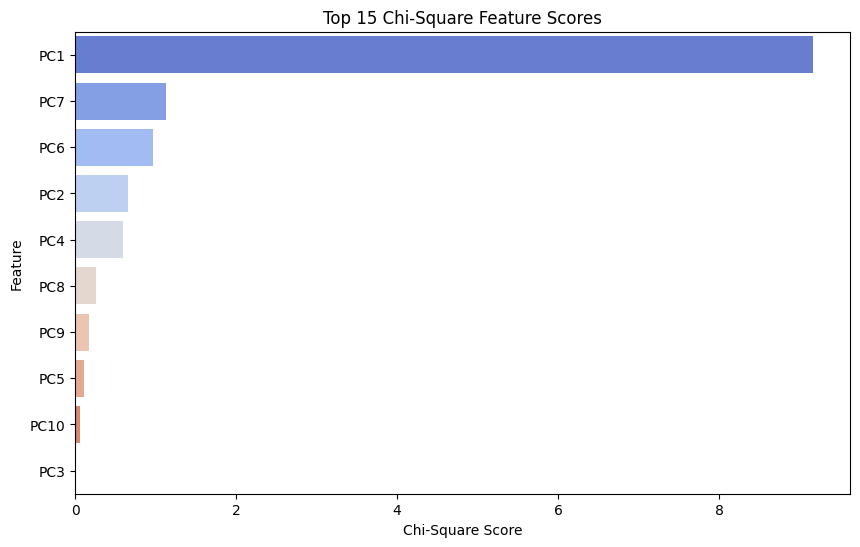

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=chi2_scores[:15], y=chi2_scores.index[:15], palette="coolwarm")
plt.title("Top 15 Chi-Square Feature Scores")
plt.xlabel("Chi-Square Score")
plt.ylabel("Feature")
plt.show()

In [48]:
top_rf = importances.head(15).index.tolist()
top_chi2 = chi2_scores.head(15).index.tolist()

selected_final = list(set(top_rf) | set(rfe_features) | set(top_chi2))
selected_final


['PC1', 'PC4', 'PC3', 'PC8', 'PC9', 'PC10', 'PC5', 'PC6', 'PC2', 'PC7']

In [49]:
X_reduced = X[selected_final]
df_reduced = pd.concat([X_reduced, y], axis=1)

df_reduced.to_csv("../data/heart_disease_selected.csv", index=False)